In [1]:
import networkx as nx
import matplotlib.pyplot as ply

%matplotlib inline

In [2]:
import parser

In [3]:
users = parser.getUsers()
friend_counts = []
for user in users:
        friend_counts.append(user.getFriendCount())

nonzero_friend_counts = [n for n in friend_counts if n > 0]

fan_counts = []
yelping_since_fans = {}
elite_for_fans = {}
for user in users:
        fan_counts.append(user.getFanCount())
        yelping_since = user.getYelpingSince()
        elite_for = user.getEliteNum()
        if yelping_since in yelping_since_fans.keys():
            yelping_since_fans[yelping_since].append(user.getFanCount())
        else:
            yelping_since_fans[yelping_since] = [user.getFanCount()]
            
        if elite_for in elite_for_fans.keys():
            elite_for_fans[elite_for].append(user.getFanCount())
        else:
            elite_for_fans[elite_for] = [user.getFanCount()]

nonzero_fan_counts = [n for n in fan_counts if n > 0]

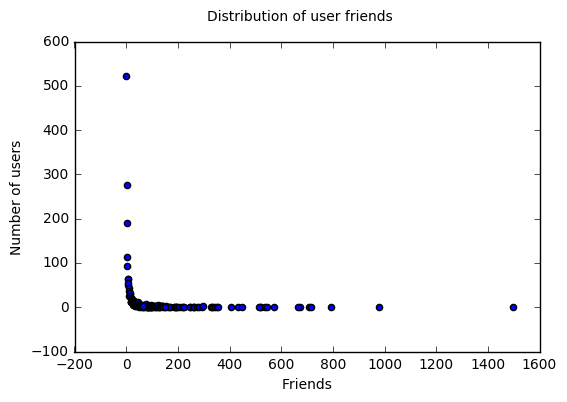

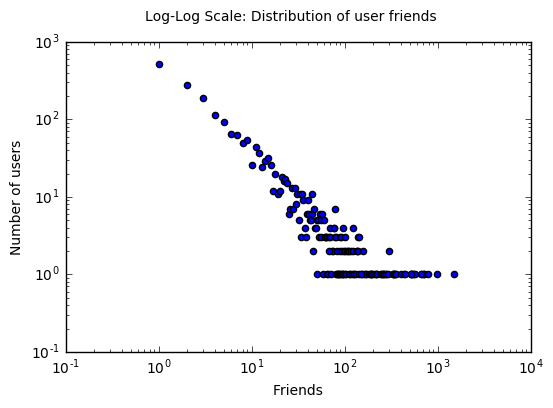

In [4]:
from collections import Counter

frequency = dict(Counter(nonzero_friend_counts))

fig = ply.figure()
ax = ply.gca()
fig.suptitle('Distribution of user friends')
ax.scatter(frequency.keys(), [frequency[n] for n in frequency.keys()])
ply.xlabel("Friends")
ply.ylabel("Number of users")
ply.show()

fig = ply.figure()
ax = ply.gca()
fig.suptitle('Log-Log Scale: Distribution of user friends')
ax.scatter(frequency.keys(), [frequency[n] for n in frequency.keys()])
ply.xlabel("Friends")
ply.ylabel("Number of users")
ax.set_yscale('log')
ax.set_xscale('log')

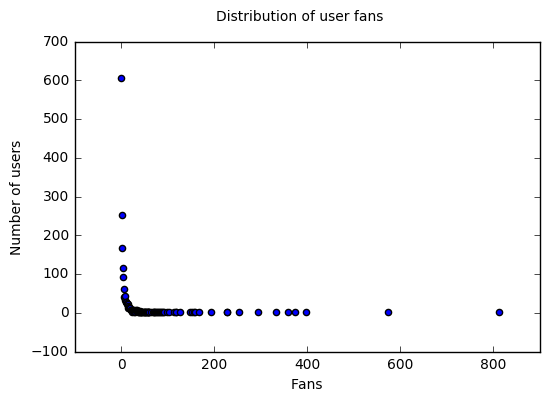

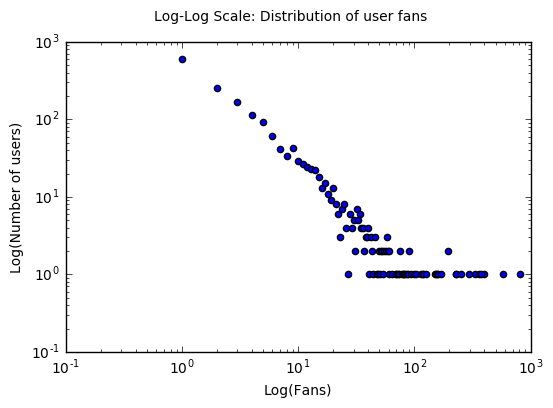

In [5]:
from collections import Counter

frequency = dict(Counter(nonzero_fan_counts))

fig = ply.figure()
ax = ply.gca()
fig.suptitle('Distribution of user fans')
ax.scatter(frequency.keys(), [frequency[n] for n in frequency.keys()])
ply.xlabel("Fans")
ply.ylabel("Number of users")
ply.show()

fig = ply.figure()
ax = ply.gca()
fig.suptitle('Log-Log Scale: Distribution of user fans')
ax.scatter(frequency.keys(), [frequency[n] for n in frequency.keys()])
ply.xlabel("Log(Fans)")
ply.ylabel("Log(Number of users)")
ax.set_yscale('log')
ax.set_xscale('log')

In [24]:
fan_counts = []
vote_counts = []

elite_fan_counts = []
elite_vote_counts = []

for user in users:
    if user.getEliteNum() > 0:
        elite_fan_counts.append(user.getFanCount())
        elite_vote_counts.append(user.getAverageVotes())

for user in users:
        fan_counts.append(user.getFanCount())
        vote_counts.append(user.getAverageVotes())

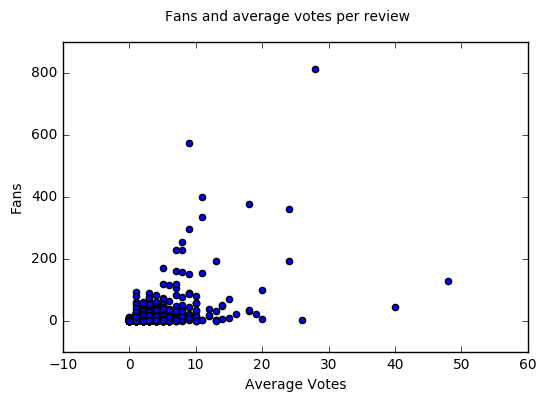

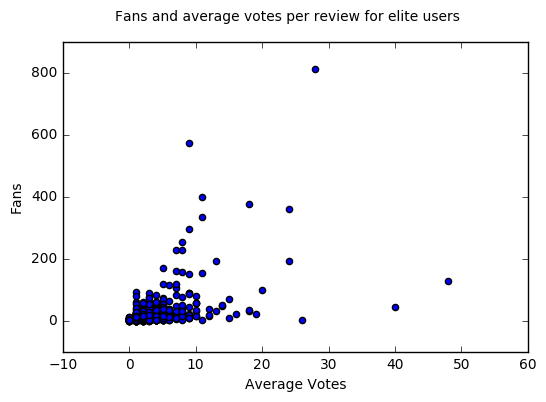

In [25]:
fig = ply.figure()
ax = ply.gca()
fig.suptitle('Fans and average votes per review')
ax.scatter(vote_counts, fan_counts)
ply.xlabel("Average Votes")
ply.ylabel("Fans")
ply.show()

fig = ply.figure()
ax = ply.gca()
fig.suptitle('Fans and average votes per review for elite users')
ax.scatter(elite_vote_counts, elite_fan_counts)
ply.xlabel("Average Votes")
ply.ylabel("Fans")
ply.show()

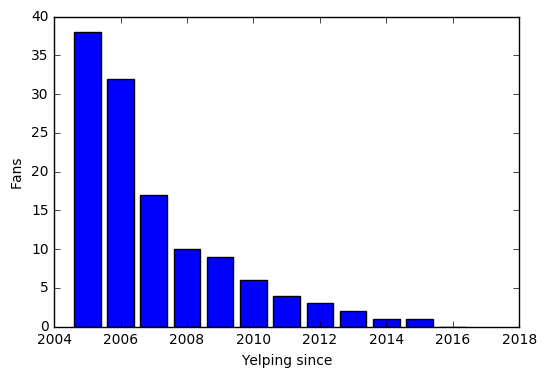

In [14]:
yelping_since = []
fan_counts = []

for year in yelping_since_fans:
    yelping_since.append(year)
    fan_counts.append(sum(yelping_since_fans[year])/len(yelping_since_fans[year]))

ply.bar(yelping_since, fan_counts, align='center')
ply.xlabel("Yelping since")
ply.ylabel("Fans")
ply.show()

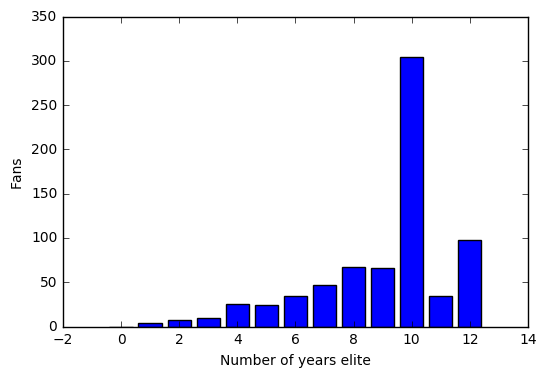

In [15]:
elite_for = []
fan_counts = []

for years in elite_for_fans:
    elite_for.append(years)
    fan_counts.append(sum(elite_for_fans[years])/len(elite_for_fans[years]))

ply.bar(elite_for, fan_counts, align='center')
ply.xlabel("Number of years elite")
ply.ylabel("Fans")
ply.show()

In [16]:
elite_for_votes = {}
for user in users:
        if user.getEliteNum() in elite_for_votes.keys():
            elite_for_votes[user.getEliteNum()].append(user.getAverageVotes())
        else:
            elite_for_votes[user.getEliteNum()] = [user.getAverageVotes()]

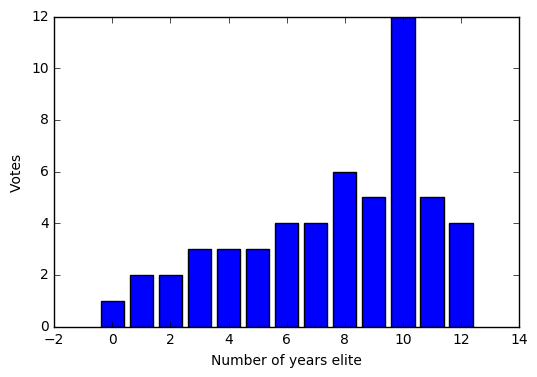

In [12]:
elite_for = []
vote_counts = []

for years in elite_for_fans:
    elite_for.append(years)
    vote_counts.append(sum(elite_for_votes[years])/len(elite_for_votes[years]))

ply.bar(elite_for, vote_counts, align='center')
ply.xlabel("Number of years elite")
ply.ylabel("Votes")
ply.show()